# Logs

> Date: 18/03/25
> - Kanbn looks exceptionally promising for workflow!
>   - Though still getting used to the workflow involved in collaboration - I find the dynamics of teamwork difficult.
> - There were many temporary and personal files in the .Net build that needed to be gitignored. We eventually resolved the issue but on reflection we should have checked and added the necessary gitignore in the same commit as the build.
> - We also have realised that we need to investigate further how split our work and learners guide should be.
> - The .Net setup seems to have similarities to NodeJs which, considering there will be many things to learn, is a good base to start on.

> Date 01/04/25 \
> Debated pros and cons of using the advised flat file vs a database. Decided a database makes a whol lot more sense even if just using SQLite: Using a database means scaling will be very easy and may only need slight changes in syntax if we switch DB, a deciding reason is when I went through how the storage and oragnisation would work for each song having multiple words and their translations in a json flat file was gonna be very messy and hard to use, whereas a DB would be dynamically editable if we desired in the future (very flexible) and the organisation of words, their language and translations is just gonna be a lot easier to work with, though a little more effort to setup.
> Did lots of Kanbn task making trying to in precise detail figure out how all the systems will fit together exactly. 



> Date 02/04/25 \
> Microsoft Azure Setup \
> Looked through the setup videos and page. It was very useful to find that we can manage permissions for the same resource group. It went through all the possible resources we could use, noting there is a translater, sql database and containers all within Azure. We realised we can likely do everything on Azure. Which can useful in the future if a company uses Azure, and the skills will be transferrable anyway. \
> Installed Azure Tools Extension as part of Deploying a web app with database tutorial. \
> https://portal.azure.com/?quickstart=true#view/Microsoft_Azure_Resources/ServicePage.ReactView/id/WebApp \
> From that we found the link and it seems that when we do want to publish it it's fairly straightforward. \
> It seems to be set up very very well and Microsoft own Github so it's well set up for that too. \
> 
> Looking into a 'Baseline highly available zone-redundant web application':
> * The architecture exposes a public endpoint via Azure Application Gateway with Web Application Firewall.
> * The App Service application uses virtual network integration and Private Link to securely communicate to Azure PaaS services such as Azure Key Vault and Azure SQL Database. ~ But I'm not sure if this virtual network aspect is needed.
>   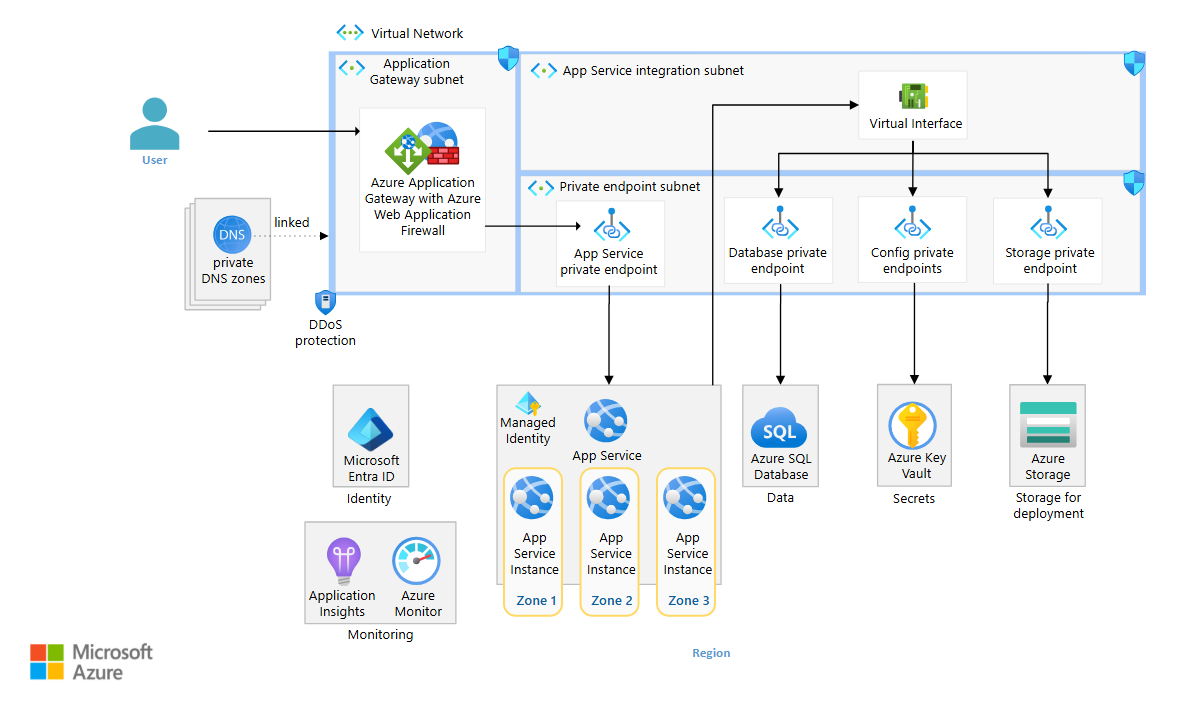
> 
> Okay I don't think this is what we are looking for, very much overkill.
> For a cloud-based web app with a database it seems to just be:
> 1. Azure App Service → Hosts our C# web app (.NET 9)
> 2. Azure SQL Database → Cloud-based relational database
> 3. App Service → DB Connection → Securely connect the web app to the database
>
> Okay I'm thinking maybe: \
> Sprint 1 (Local Development):
> 1. Reuben codes the C# web app locally using SQLite (for now).
> 2. I set up an Azure SQL connection locally.
> 3. Both test locally using mock data.
>
> Sprint 2+ (Cloud Integration, Improvements & Features)::
> 1. Push the app to Azure App Service.
> 2. Configure CI/CD deployment.
> 3. Add data analytics.
> 4. Improve performance & security.
> 5. Decide if microservices or API changes are needed.
>
> Okay I'm making a resource group. 
> There is a choice between UK South and West Europe. UK has lower latency but less azure services and a highest cost. West Europe is also more scalable/flexible future options. Seems reasonable to pick West Europe then. This is not a higher level project and so tags will not be needed - indicated knowledge after having watched all the videos linked in the Collab_Doc.\
> Very simple, just:
> 1. Go to Azure Portal
> 2. Search for "Resource Groups"
> 3. Click Create
> 5. Choose a Name (e.g., LyricalLearning-RG)
> 6. Pick a Region (e.g., West Europe, East US)
> 7. Click Review + Create
> 
> 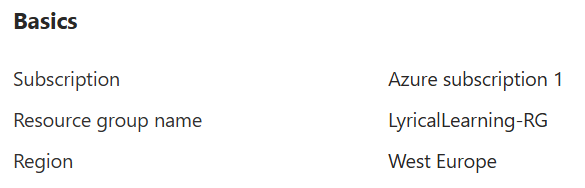 \
> Okay Now I have created a resource group I will add Reuben. \
> Very simple, just:
> 1. Open the Resource Group 
> 2. Go to Access Control (IAM)
> 3. Click Add → Add Role Assignment (look at the tabs for different roles, the contributor was in the second one - management I think)
> 4. Select Contributor (so he can manage resources but not billing - felt this was fair, partially as I want to use this after we're done and he may not, so billing is usefully attributed to me - I'm sure if that changes it's an easy fix)
> 6. Enter Reuben's Azure email
> 7. Click Review + Create (twice - it shows you all the details etc)
>
> Next Steps; Setting up Azure SQL in this Resource Group, Linking our Azure App Service to this group, CI/CD deployment in this setup.
>
> Setting up Azure SQL:
> 1. Create 'single' Azure Database from Azure Portal - Notice: Want to try Azure SQL Database for free? Create a free serverless database with the first 100,000 vCore seconds, 32GB of data, and 32GB of backup storage free per month for the lifetime of the subscription. Limit ten free databases per subscription ~ Good to know
> 2. Attach to Resource Group
> 3. Create New Server as we have none; Name: lyrical-sql-server, West Europe location as before, Use Microsoft Entra-only authentication as this is more secure, less messy and easier than SQL as it should just connect to our account with the usual permissions. ~ Okay West Europe is not allowed so we must use UK South 'Your subscription does not have access to create a server in the selected region. For the latest information about region availability for your subscription, go to aka.ms/sqlcapacity. Please try another region or create a support ticket to request access.'
>
> 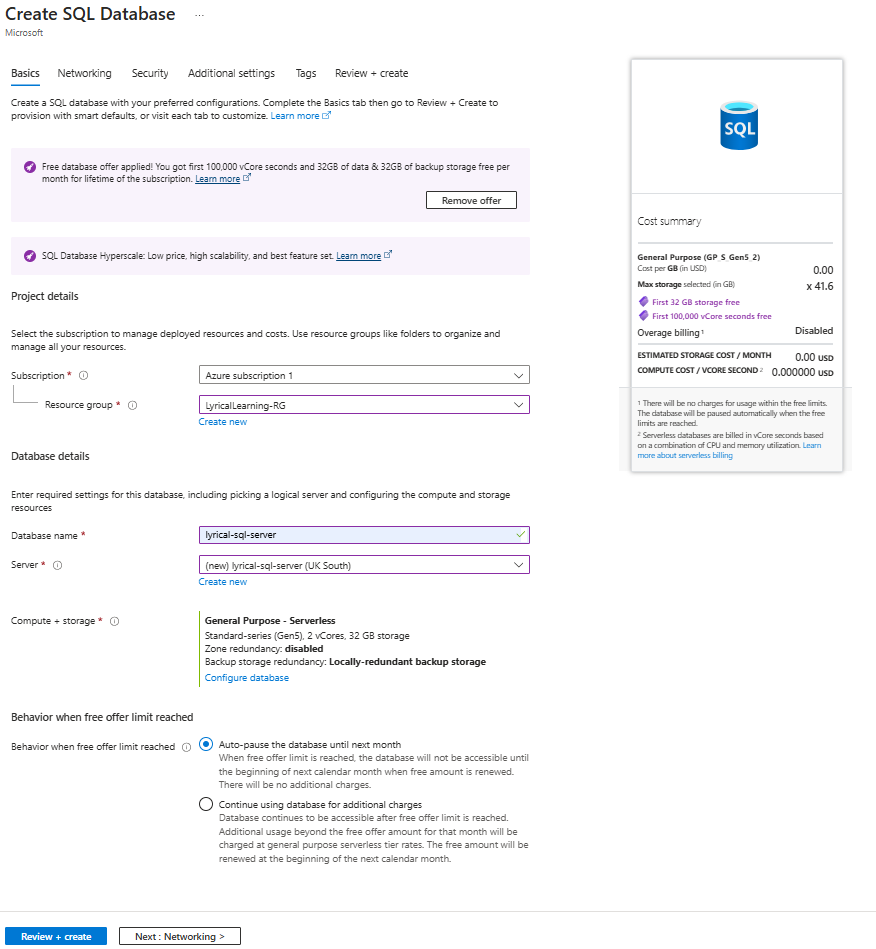
>
> 4. We are not doing a virtual network and want to eventually deploy so public is fine and still requires credentials.
> 5. Allow Azure services and resources to access this server - yes as we need it communicate with our App service.
> 6. Add current client IP address - yes as otherwise I won't be able to access from my local machine, need to add Reuben's manually later then.
> 7. Connection default seems fine.
> 8. Minimum TLS version - TLS 1.2 was the only option anyway
> 9. Microsoft Defender for SQL - not necessary and extra expense, so no for now at least.
> 10. Ledger is not necessary as that is about data being tampered with.
> 11. There is a Server Identity we will need later - Use system assigned and user assigned managed identities to enable central access management between this database and other Azure resources. Not now though.
> 12. There is also some encryption we will not need now at least, and if ever then can be added later.
> 13. Database collation: Latin1_General_100_CI_AS_SC_UTF8 - given we need a wide variety of alphabets and we are using 2019+ SQL server. \
> Note: It will cost 5.50$ a month after the free trial.
> 
>
> Okay so the Server is the container for our databases where we can manage aspects of authentication/security. The App is where out .NET app will run, it has a Managed Identity, which is an automatically created Entra ID identity as that was the choice of authentication, this allows the app to authenticate without username/password which is useful - still secure of course.
>
> The next steps require:
> 1. Deloy: Deployment of the .NET into the App Service, 
> 2. Enable: enable a managed identity on app service: \
> Enable: In the App Service, go to Identity (under Settings) and turn on System-assigned Managed Identity.
> 3. Grant Acess: grant the app service access:
> Go to Azure SQL Server, under Active Directory admin, enable Entra authentication. Then go to the database and open Query Editor and run: \
> ```CREATE USER [your-app-service-name] FROM EXTERNAL PROVIDER;```\
> ```ALTER ROLE db_owner ADD MEMBER [your-app-service-name];```
> 4. Connect: connect in .NET:
> In appsettings.json - ```json
{
  "ConnectionStrings": {
    "DefaultConnection": "Server=tcp:lyrical-sql-server.database.windows.net,1433;Database=LyricalLearningDB;Encrypt=True;Authentication=Active Directory Default;"
  }
}``` \
> cmd: ```dotnet add package Azure.Identity```, ```dotnet add package Microsoft.Data.SqlClient``` \
> In Program.cs - ```var credential = new DefaultAzureCredential();```
>
> Deploying:
> * Okay so we made the app service, connected it to the Github Repository and enabled CI which is really cool Azure have that set up, but put private as it seemed to not need public given it would only be communicating within Azure, however that is a mistake because it forgets the Github deployment and so we tried a few things before 


> Date 03/04/25
> 
> Create an Azure SQL Database using the REST API : https://learn.microsoft.com/en-us/rest/api/sql/rest-api-sql-create-or-update-database ~ Useful link for later/Reuben \
> Configure continuous deployment to Azure App Service : https://learn.microsoft.com/en-us/azure/app-service/deploy-continuous-deployment?tabs=github%2Cgithubactions#configure-the-deployment-source ~ Useful link for later \
> Couldn't access Query editor in Grant access stage. Okay seemed to fix itself having re-added my IP address though I think it just needed time and a retry. \
> 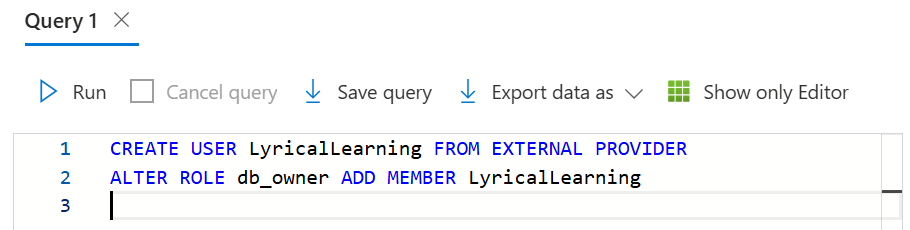 \
> 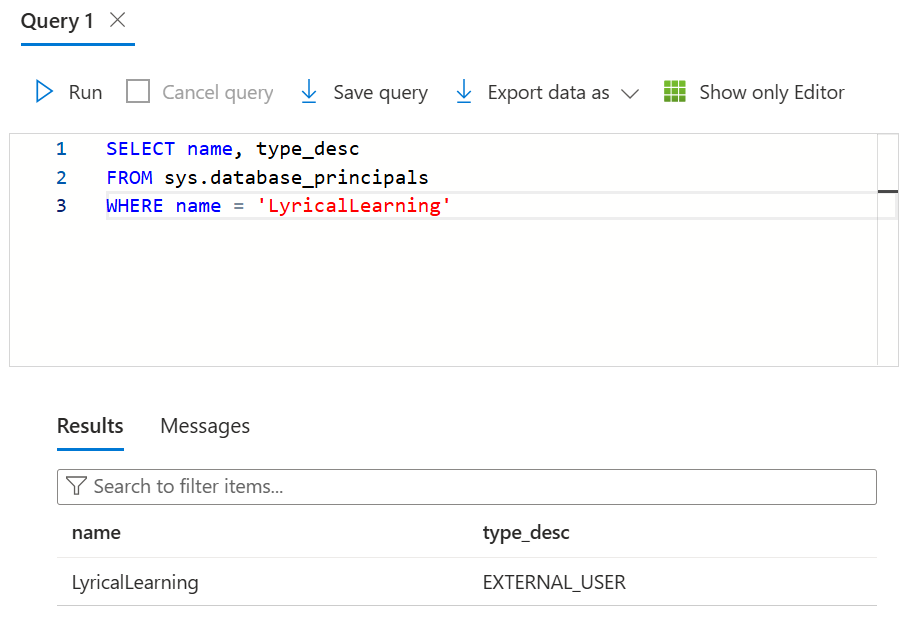 \
> Working well, didn't even need to run it,just hitting Enter seemed to do it, or the DB was already added but the second commands show everything seems in good order. \
> When you try leave the query editor it says changes will not be saved, this isn't a concern it is simply that if you have written a complex script this will not be saved. \
> Merged the changes and hopefully it is now connected to the DB. Saw evidence of the CI working well, re-deploying with the changes - Very cool! Though I think there are no proper tests as of yet.
>
> Okay Now to quickly test if the connection is working. Adding the check in Program.cs. \
> Something's not quite right \
> 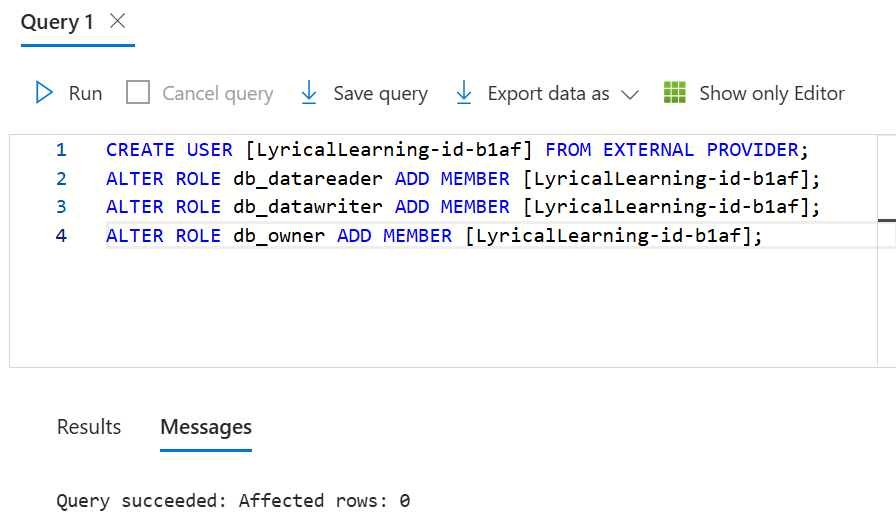 \
> Okayyyy, Free Plan does not include Managed Identity so I need to revert and use SQL authentication instead!!! \
>
> ```SQL
> -- To create a new SQL login
> CREATE USER LyricalUser WITH PASSWORD = 'YourSecurePassword123';
> ALTER ROLE db_owner ADD MEMBER LyricalUser;
> ```
> Clean cmd: ```dotnet remove package Azure.Identity```, ```dotnet clean```, ```dotnet build``` \
> Plus changes to Program no longer using identity and in appsettings.json: 
> ```json
> "ConnectionStrings": {
>    "DefaultConnection": "Server=tcp:lyrical-sql-server.database.windows.net,1433;Database=LyricalLearningDB;User ID=LyricalUser;Password=YourSecurePassword123;Encrypt=True;"
>  }
> ```
> Checking LyricalUser in the DB: 
> ```SQL
> SELECT name FROM sys.database_principals WHERE type IN ('S', 'U', 'G');
> ```
> Logging does not appear to working within Program.cs so I do not know if connection is happening. \
> In App Service Logs, logging in a application and web need to be (at least one) enabled but unsure how this is all fitting together. The Log stream section shows a successful connection and the app works as usual but still nothing.
> cmd: ```dotnet add package Microsoft.Extensions.Logging.AzureAppServices```
>
> 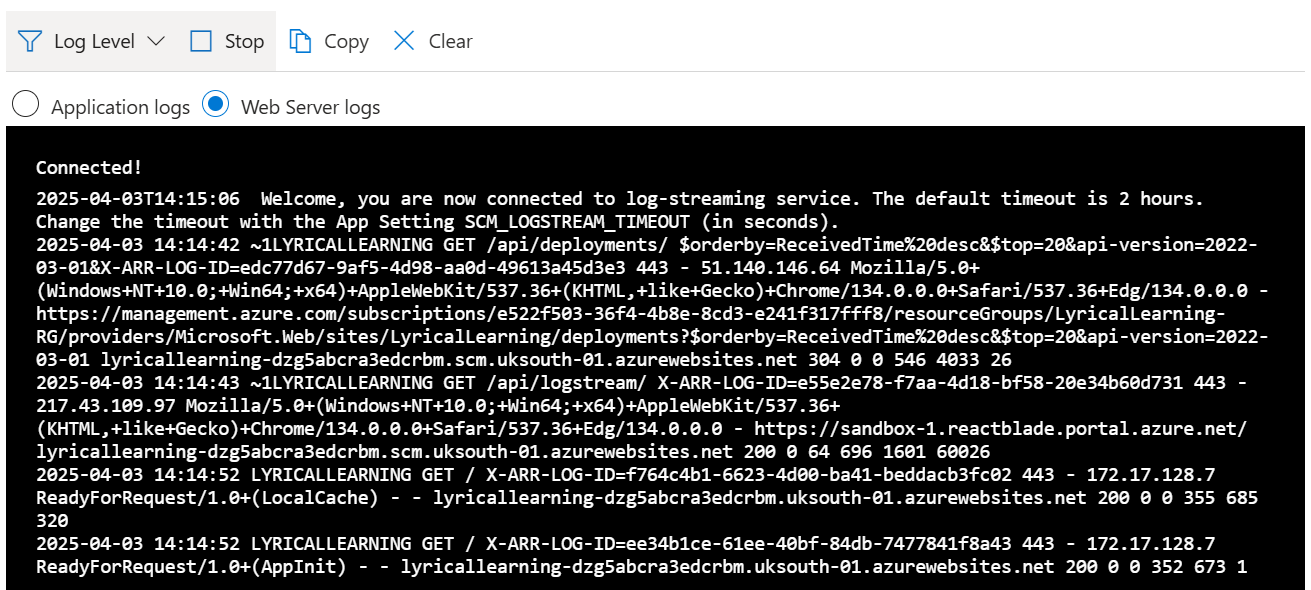
>
> Yes, Yes, Yes. Okay it's connected.


# Working with Github

## Command Line

- To amend a previous commit message: ```git commit --amend```
- To undo the last commit: ```git reset --soft HEAD~1```
- To gitignore the necessary folders and files: ```dotnet new gitignore```

## Github merging
> Needed to manually accept all the changes, not deleting anything. We had some issues trying to figure this out by creating a new branch and then finding the same problem. The problem was not, it seems, in the branch but the merging process. Kanbn though good, is proving very frustrating! when we both want to add and change tasks on it. Looking forward we will work on different branches then merge, and we will likely move Kanbn out this repositories to an online version.

> Seems like the cleanest way forward is both using branches where we can do commits, then when we are sure something is good and at the next stage we can merge out parts to the main branch. This also allows errors to be handled better rather than messing up the main branch. Further, the Learning Log aspect is becoming a nuisance if say I just want to pull Reuben's changes in C#.